In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_normal = pd.read_csv('./data/normal_training.csv')

In [3]:
train_normal.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [4]:
test_faulty = pd.read_csv('./data/faulty_testing.csv')

In [5]:
test_faulty.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1,1,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,...,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,1,1,2,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,...,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,1,1,3,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,...,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,1,1,4,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,...,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,1,1,5,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,...,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681


In [6]:
import numpy as np
import sklearn.decomposition
import sklearn.preprocessing
from sklearn.decomposition import PCA

In [7]:
pca = PCA()

## Preparing the data

In [8]:
df_train = train_normal[train_normal.simulationRun==1].iloc[:,3:]

In [9]:
df_validation = train_normal[(train_normal.simulationRun>1)&(train_normal.simulationRun<5)].iloc[:,3:]

In [10]:
df_test = train_normal[(train_normal.simulationRun>5)&(train_normal.simulationRun<10)].iloc[:,3:]

# Model

In [18]:
class ModDimRed:
    
    def __init__(self, model, n_components, nmf=False):
        self.n_components=n_components
        self.model=model
        self.nmf=nmf
        
    # spe: squared prediction errors
    def spe (self, X, X_pred): 
        return np.sum((X-X_pred)**2, axis=1)
   
    def train(self, df_train):
        
        self.mu_train = df_train.mean(axis=0)
        self.std_train = df_train.std(axis=0)
        
        if self.n_components == 0:
            if self.model == 'fastica':
                self.m = sklearn.decomposition.FastICA()
            elif self.model == 'pca':
                self.m = sklearn.decomposition.PCA() 
            elif selfmodel == 'incrementalpca':
                self.m = sklearn.decomposition.IncrementalPCA()
            elif self.model == 'kernelpca':
                self.m = sklearn.decomposition.KernelPCA(fit_inverse_transform=True)
            elif self.model == 'nmf':
                self.m = sklearn.decomposition.NMF()
            elif self.model == 'truncatedsvd':
                self.m = sklearn.decomposition.TruncatedSVD()
        else:
            if self.model == 'fastica':
                self.m = sklearn.decomposition.FastICA(n_components=self.n_components)
            elif self.model == 'pca':
                self.m = sklearn.decomposition.PCA(n_components=self.n_components) 
            elif self.model == 'incrementalpca':
                self.m = sklearn.decomposition.IncrementalPCA(n_components=self.n_components)
            elif self.model == 'kernelpca':
                self.m = sklearn.decomposition.KernelPCA(fit_inverse_transform=True,
                                                         n_components=self.n_components)
            elif self.model == 'nmf':
                self.m = sklearn.decomposition.NMF()
            elif self.model == 'truncatedsvd':
                self.m = sklearn.decomposition.TruncatedSVD(n_components=self.n_components)
            

        
        if self.nmf:
            scaler = sklearn.preprocessing.MinMaxScaler()
            fit_x = scaler.fit(df_train)
            X_train = scaler.transform(df_train)
        else:
            X_train = sklearn.preprocessing.scale(df_train)
        # Transform data back to its original space.
        X_train_pred = self.m.inverse_transform(self.m.fit_transform(X_train)) 
        
        return self.spe(X_train, X_train_pred) # return spe
            
    def test(self, df_test):
        
        # standardizing test data according to the mu and std of training set
        if self.nmf:
            scaler = sklearn.preprocessing.MinMaxScaler()
            fit_x = scaler.fit(df_test)
            X_test = scaler.transform(df_test)
        else:
            X_test = np.array((df_test-self.mu_train)/self.std_train) 
        X_test_pred = self.m.inverse_transform(self.m.transform(X_test))

        return self.spe(X_test, X_test_pred)

# Training Data

In [19]:
models = {'PCA': ModDimRed(model='pca', n_components=30, nmf=False),
          'FastICA': ModDimRed(model='fastica', n_components=30, nmf=False),
          'IncrementPCA': ModDimRed(model='incrementalpca', n_components=30, nmf=False),
          'KernelPCA': ModDimRed(model='kernelpca', n_components=30, nmf=False),
          'NMF': ModDimRed(model='nmf', n_components=30, nmf=True),
          'TruncSVD': ModDimRed(model='truncatedsvd', n_components=30, nmf=False),
          }
detection_limits = {}

for name, model in models.items():
    
    spe_train = model.train(df_train)
    spe_validation = model.test(df_validation)
    spe_test = model.test(df_test)
    
    detection_limits[name] = np.percentile(spe_validation, 99.99)

c:\users\m477a\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
c:\users\m477a\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\users\m477a\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\users\m477a\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\users\m477

# Testing Data

c:\users\m477a\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\users\m477a\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\users\m477a\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\users\m477a\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\users\m477a\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1637: 

PCA             58.99375
FastICA         58.99375
IncrementPCA    59.10625
KernelPCA       58.99375
NMF              8.69375
TruncSVD        58.98125
dtype: float64


,IDV(1),IDV(2),IDV(3),IDV(4),IDV(5),IDV(6),IDV(7),IDV(8),IDV(9),IDV(10),IDV(11),IDV(12),IDV(13),IDV(14),IDV(15),IDV(16),IDV(17),IDV(18),IDV(19),IDV(20)
PCA,99.625,98.000,0.750,87.250,15.625,100.0,99.250,96.750,0.75,12.250,37.375,96.375,90.500,99.875,0.875,22.625,81.625,92.500,2.625,45.250
FastICA,99.625,98.000,0.750,87.250,15.625,100.0,99.250,96.750,0.75,12.250,37.375,96.375,90.500,99.875,0.875,22.625,81.625,92.500,2.625,45.250
IncrementPCA,99.625,98.000,0.625,84.625,19.125,100.0,99.625,97.625,0.75,13.000,35.500,96.500,90.875,99.750,0.375,24.375,81.250,92.375,3.000,45.125
KernelPCA,99.625,98.000,0.750,87.250,15.625,100.0,99.250,96.750,0.75,12.250,37.375,96.375,90.500,99.875,0.875,22.625,81.625,92.500,2.625,45.250
NMF,0.250,0.375,0.000,0.625,0.000,100.0,1.250,1.375,0.00,0.000,0.000,2.375,0.250,0.000,0.000,0.250,0.000,66.625,0.000,0.500
TruncSVD,99.625,98.000,0.750,87.250,15.625,100.0,99.125,96.875,0.75,12.125,37.250,96.375,90.500,99.875,0.875,22.625,81.625,92.500,2.625,45.250


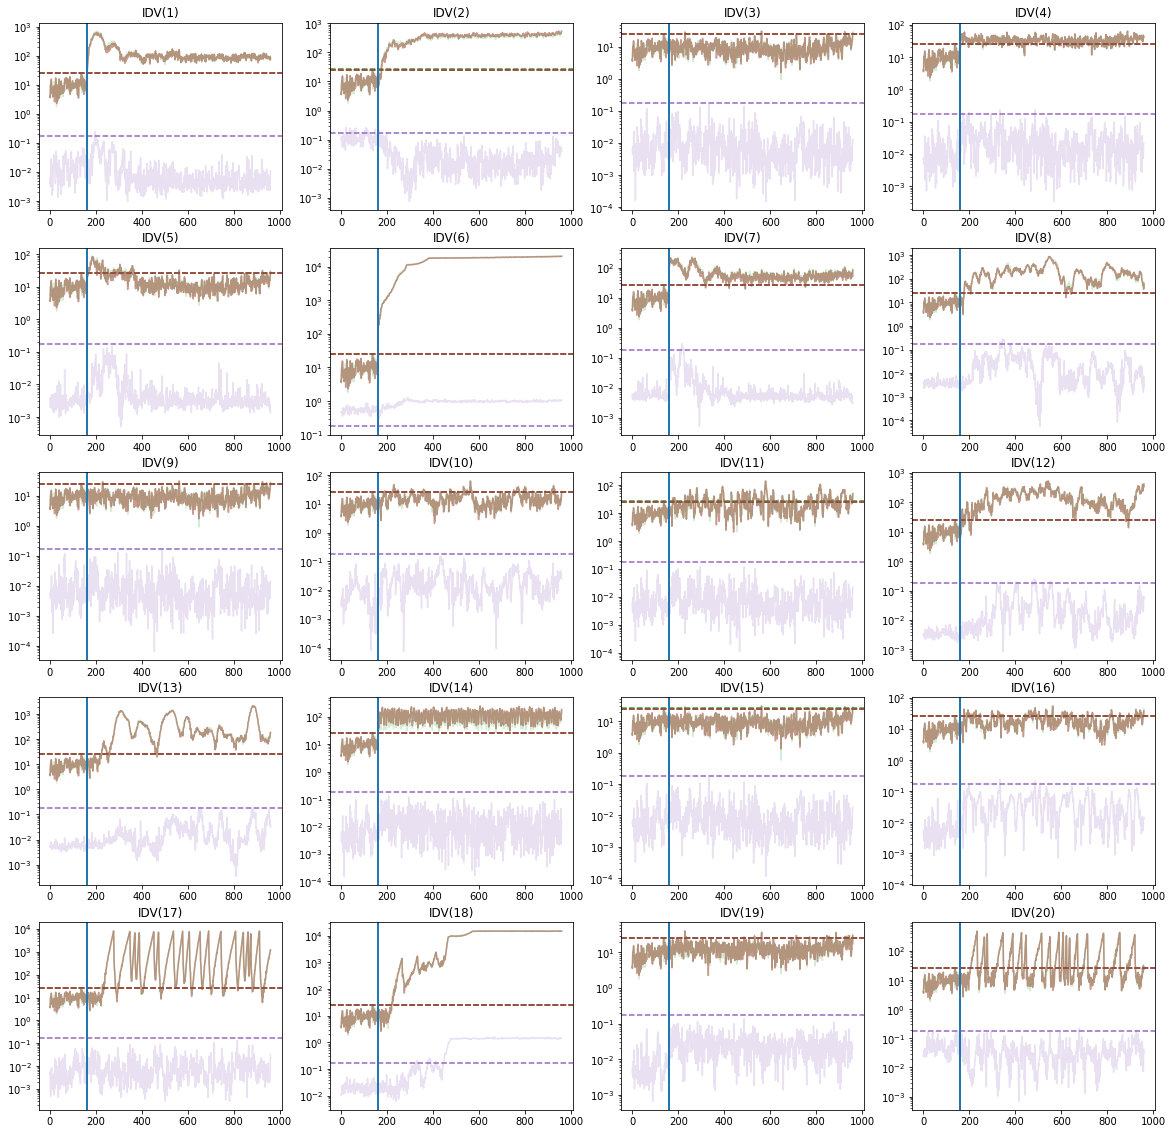

In [21]:
fig, ax = plt.subplots(5,4, figsize = (20, 20))

fdr_df = pd.DataFrame(index=[f'IDV({i})' for i in range(1,21)])

for name, model in models.items():

    spe_test = []
    fdr = []

    for i in range(20):

        df_test = test_faulty[(test_faulty.faultNumber==i+1) & (test_faulty.simulationRun==1)].iloc[:,3:]

        spe_test.append(model.test(df_test))

        fault_occurrence = len(spe_test[i])//6

        fdr.append(np.mean(spe_test[i][fault_occurrence:]>detection_limits[name]))

        color = next(ax.ravel()[i]._get_lines.prop_cycler)['color']
        ax.ravel()[i].plot(np.arange(len(spe_test[i])), spe_test[i], color = color, alpha=0.2)
        ax.ravel()[i].axhline(detection_limits[name], ls='--', color = color)
        ax.ravel()[i].axvline(fault_occurrence)
        ax.ravel()[i].set_title(f'IDV({i+1})')
        ax.ravel()[i].set_yscale('log')
        
    fdr_df[name] = fdr
    
print(100*fdr_df.mean()) # average of the detection error for every type of disturbance   
100*fdr_df.T